In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from models.model_fpgan import FPGANSynthesizer
from models.model_ctgan import CTGANSynthesizer
from models.model_dpctgan import DPCTGANSynthesizer

import ctgan
from sklearn.model_selection import train_test_split
from utils.privacy import normalized_avg_dist
from utils.fidelity import get_predictions, eval_fidelity, get_accuracy, get_roc_auc

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
data = pd.read_csv("D:/Datasets/bankruptcy/data.csv")
data = data.drop(columns=[' Net Income Flag', ' Liability-Assets Flag'])
data.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Current Liability to Current Assets,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.118250,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.047775,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.025346,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.067250,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.047725,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,0.035490


In [4]:
data.shape

(6819, 94)

In [5]:
#normalized_data=(data-data.mean())/data.std()
data=(data-data.min())/(data.max()-data.min())

In [6]:
target = 'Bankrupt?'

In [7]:
X = data.drop(columns=[target])
y = data[target]

In [8]:
y_series = pd.Series(y)

# Calculate the class distribution
class_distribution = y_series.value_counts(normalize=True) * 100

print(class_distribution)

0.0    96.77372
1.0     3.22628
Name: Bankrupt?, dtype: float64


In [8]:
#model_ctgan = CTGANSynthesizer(epochs=25, verbose=True)
#model_ctgan = DPCTGANSynthesizer(verbose=True)
model_ctgan = FPGANSynthesizer(epochs=25, verbose=True)
#original_losses, tranformed_privacies, losses = model_ctgan.fit(data)
model_ctgan.fit(data, rate=0.75)

Epoch 1, Loss G:  0.1194,Loss D: -3.6559
Epoch 2, Loss G: -0.3400,Loss D: -1.5384
Epoch 3, Loss G: -0.4952,Loss D: -0.3103
Epoch 4, Loss G: -0.5579,Loss D:  0.3596
Epoch 5, Loss G: -0.2978,Loss D: -0.2172
Epoch 6, Loss G: -0.0384,Loss D: -0.4861
Epoch 7, Loss G:  0.2098,Loss D:  0.6041
Epoch 8, Loss G:  0.7385,Loss D: -1.3688
Epoch 9, Loss G:  0.3959,Loss D: -1.0024
Epoch 10, Loss G:  0.5187,Loss D: -1.2511
Epoch 11, Loss G:  0.0625,Loss D: -1.5806
Epoch 12, Loss G:  0.0964,Loss D: -1.5054
Epoch 13, Loss G: -0.0856,Loss D:  0.2394
Epoch 14, Loss G: -0.2815,Loss D:  0.6561
Epoch 15, Loss G: -0.1789,Loss D:  0.2815
Epoch 16, Loss G: -0.2231,Loss D: -0.0868
Epoch 17, Loss G:  0.0483,Loss D: -0.2766
Epoch 18, Loss G: -0.0927,Loss D:  0.1551
Epoch 19, Loss G: -0.0432,Loss D:  0.3356
Epoch 20, Loss G: -0.0589,Loss D: -0.1525
Epoch 21, Loss G:  0.0543,Loss D:  0.2815
Epoch 22, Loss G:  0.1578,Loss D:  0.5989
Epoch 23, Loss G:  0.3193,Loss D: -0.7879
Epoch 24, Loss G:  0.4413,Loss D:  0.1252
E

([array(0.00955805, dtype=float32),
  array(0.03656685, dtype=float32),
  array(0.0568771, dtype=float32),
  array(0.08659206, dtype=float32),
  array(0.11018577, dtype=float32),
  array(0.1585396, dtype=float32),
  array(0.17667758, dtype=float32),
  array(0.18748857, dtype=float32),
  array(0.20957519, dtype=float32),
  array(0.23590602, dtype=float32),
  array(0.30498317, dtype=float32),
  array(0.29579422, dtype=float32),
  array(0.29275456, dtype=float32),
  array(0.35913002, dtype=float32),
  array(0.28704593, dtype=float32),
  array(0.23014651, dtype=float32),
  array(0.24409004, dtype=float32),
  array(0.23358539, dtype=float32),
  array(0.10258762, dtype=float32),
  array(0.01465855, dtype=float32),
  array(0.00385198, dtype=float32),
  array(-0.07119626, dtype=float32),
  array(-0.11677174, dtype=float32),
  array(-0.22732286, dtype=float32),
  array(-0.29508445, dtype=float32),
  array(-0.33458716, dtype=float32),
  array(-0.38396862, dtype=float32),
  array(-0.4921633, dtyp

In [32]:
from utils.utils import save_models
save_models(model_ctgan, '075fpgan25', 'bankruptcy')

In [33]:
from utils.utils import load_models
model_ctgan = load_models('075fpgan25', 'bankruptcy')

In [54]:
samples = model_ctgan.sample(len(data))  # Synthetic copy
samples.dropna(how='any', inplace=True)

X_syn = samples.drop(columns=[target])
y_syn = samples[target]
y_syn = y_syn.round(0)
y_syn = y_syn.astype(int)

## Privacy

In [55]:
samples = samples.apply(pd.to_numeric) # convert all columns of DataFrame
data = data.apply(pd.to_numeric) # convert all columns of DataFrame
samples = samples[:2000]
data = data[:2000]

In [56]:
normalized_avg_distance = normalized_avg_dist(samples, data)
print(normalized_avg_distance)

[0.07012317]


## Fidelity

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

X_syn_train, X_syn_test, y_syn_train, y_syn_test = train_test_split(X_syn, y_syn, test_size=0.3, random_state=42, stratify=y_syn)

rr_pred = []
fr_pred = []
ff_pred = []
rf_pred = []

rr_pred = get_predictions(X_train, y_train, X_test, y_test)
fr_pred = get_predictions(X_syn_train, y_syn_train, X_test, y_test)

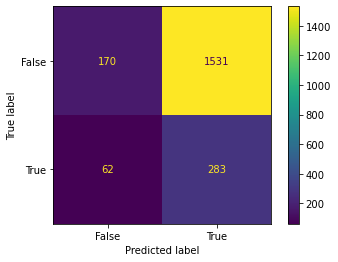

In [58]:
from sklearn import metrics
def print_confusion_matrix(rr_pred, fr_pred):
    confusion_matrix = metrics.confusion_matrix(rr_pred, fr_pred)

    cm_display1 = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

    cm_display1.plot()
    plt.show()
    
print_confusion_matrix(rr_pred, fr_pred)

In [59]:
percentage = eval_fidelity(rr_pred, fr_pred)

In [60]:
rr_acc = get_accuracy(y_test, rr_pred)
fr_acc = get_accuracy(y_test, fr_pred)
print("Accuracy of real data: ", rr_acc)
print("Accuracy of synthetic data: ", fr_acc)

Accuracy of real data:  0.8509286412512219
Accuracy of synthetic data:  0.13196480938416422


In [61]:
rr_score = get_roc_auc(y_test, rr_pred)
fr_score = get_roc_auc(y_test, fr_pred)
print("ROC AUC of real data: ", rr_score)
print("ROC AUC of synthetic data: ", fr_score)

ROC AUC of real data:  0.8277777777777777
ROC AUC of synthetic data:  0.448989898989899


In [62]:
# from utils.fidelity import get_class_ratios
# rr_class1, rr_class2 = get_class_ratios(rr_pred, fr_pred, target)
# print("Class 1 ratio of real data: ", rr_class1)

## Final plot

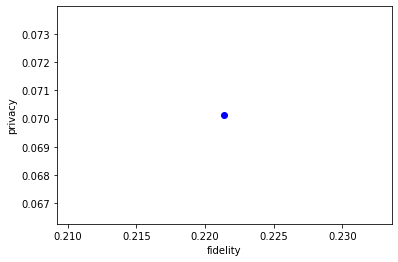

0.22140762463343108 [0.07012317]


In [63]:
plt.scatter(percentage, normalized_avg_distance, c ="blue")
plt.xlabel("fidelity")
plt.ylabel("privacy")
plt.show()
print(percentage, normalized_avg_distance)